# Hoeffding Inequality

In [ ]:
import numpy as np

V_0_Total = list()
V_min_Total = list()
V_random_Total = list()

iteration = 100000
toss = 10
N = 1000
    
random_coin = np.random.randint(0, N)

for itr in xrange(iteration): 

    V = list()

    coins = np.array(np.random.uniform(0, 1., size=(toss, N)))

    coins[coins >= 0.5] = 1
    coins[coins < 0.5] = 0

    for i in xrange(N):
        V.append(coins[:,i].sum())

    V_0_Total.append(V[0]/float(toss))
    V_min_Total.append(min(V)/float(toss))
    V_random_Total.append(V[random_coin]/float(toss))

In [3]:
print sum(V_0_Total)/len(V_0_Total)
print sum(V_min_Total)/len(V_min_Total)
print sum(V_random_Total)/len(V_random_Total)


0.499388
0.037275
0.5002


# Linear Regression

In [ ]:
def output_func(x1, x2, slope, point):
    output = slope*x1 - slope*point[0] + point[1] - x2
    return output

In [80]:
import graphlab
import numpy as np
import random
import math

max_run = 1000 # No. of repeat the experiment
N = 100 # sample data size

run = 0 # track the run number, inital 
prediction_errors = list() # track the in sample errors
out_sample_errors = list() # track the out sample errors

while run < max_run:

    # Generate data 
    features_1 = np.array(([[1]]*N))
    features_2 = np.array((np.random.uniform(-1, 1., size=(N, 2)))) # generating two random, uniformly distributed points in [-1, 1]
    features = np.hstack((features_1, features_2))
    
    function_f_points = np.array((np.random.uniform(-1, 1., size=(2, 2))))
    
    # Calculate the slope
    slope = (function_f_points[1,1] - function_f_points[0,1])/(function_f_points[1,0] - function_f_points[0,0])
    
    # Calculate the output
    output = output_func(features_2[:,0], features_2[:,1], slope, function_f_points[0,:])
    output = graphlab.SArray(np.sign(output))

    # Weights based on the Linear Regression Algorithm
    W = np.dot(np.linalg.pinv(features), output)
    
    # In sample predictions
    predict_g = graphlab.SArray(np.sign(np.dot(features, W)))
    prediction_results = [predict_g == output]
    
    # In sample errors
    prediction_errors.append((len(prediction_results[0]) - sum(prediction_results[0])) / float(len(prediction_results[0])))
    
    # Generate out sample points
    random_points_out_sample_pre = np.array((np.random.uniform(-1, 1., size=(1000, 2))))
    random_points_out_sample = np.hstack((np.array(([[1]]*1000)), random_points_out_sample_pre))
    random_points_out_sample_output = output_func(random_points_out_sample_pre[:,0], random_points_out_sample_pre[:,1], slope, function_f_points[0,:])
    random_points_out_sample_output = graphlab.SArray(map(lambda number: +1. if number >= 0 else -1., random_points_out_sample_output))
    
    # Out sample predictions
    predict_out_sample = graphlab.SArray(map(lambda number: +1. if number >= 0 else -1., np.dot(random_points_out_sample, W)))
    prediction_out_sample_results = [predict_out_sample == random_points_out_sample_output]
    
    # Out sample errors
    out_sample_errors.append((len(prediction_out_sample_results[0]) - sum(prediction_out_sample_results[0])) / float(len(prediction_out_sample_results[0])))
    
    run +=1

print "Avg. Error of in sample is: " + str(sum(prediction_errors)/float(len(prediction_errors))) 
print "Avg. Error of out sample is: " + str(sum(out_sample_errors)/float(len(out_sample_errors))) 

Avg. Error of in sample is: 0.03848
Avg. Error of out sample is: 0.048266


In [83]:
max_run = 1000 # No. of repeat the experiment
N = 10 # sample data size
correct_target = N # no. of correct target to converge 

run = 0 # track the run number, inital 
iter_success_list = list() # track the succssfully converged iteration no. in each run
prediction_results = list() # track the relationship between f and g to calculate P[f(x) != g(x)]

while run < max_run:
    
    ## Linear Regression Algorithm part:
    
    # Generate data 
    features_1 = np.array(([[1]]*N))
    features_2 = np.array((np.random.uniform(-1, 1., size=(N, 2)))) # generating two random, uniformly distributed points in [-1, 1]
    features = np.hstack((features_1, features_2))

    function_f_points = np.array((np.random.uniform(-1, 1., size=(2, 2))))    
    
    # Calculate the slope
    slope = (function_f_points[1,1] - function_f_points[0,1])/(function_f_points[1,0] - function_f_points[0,0])
    
    # Calculate the output
    output = output_func(features_2[:,0], features_2[:,1], slope, function_f_points[0,:])
    output = graphlab.SArray(np.sign(output))

    # Weights based on the Linear Regression Algorithm
    W = np.dot(np.linalg.pinv(features), output)

    ## Perceptron Learning Algorithm part:
    
    # inital values for each run
    iteration = 0 # track the iteration number
    weights= W # initial vector weights
    errors = [0]*N # inital errors

    while sum(errors) < correct_target:

        # Calculate the sign of predictions
        predictions = graphlab.SArray(np.sign(np.dot(features, weights)))

        # compare the prediction with output
        errors = graphlab.SArray(predictions == output)
        #print "iteration " + str(iteration) + ": " + str(sum(errors)) + " correct predictions."


        misclassified_points = list() # track the misclassifed points index
        mis_points = list() # track the misclassfied points

        for num in xrange(N):
            if errors[num] == 0:
                misclassified_points.append(num)
                mis_points.append(features[num,:])

        if sum(errors) < correct_target:

            # Randomly choose one point from misclassified points (choose index in here) 
            misclassified_point = random.choice(misclassified_points)

            # Recalculate the weights
            weights += features[misclassified_point, :] * output[misclassified_point]

        else:

            iter_success_list.append(iteration) # include the successfully converged iteration number
            run += 1 # update the run number


            print "Run #" + str(run) + ": " + "successfully converged @ iteration: " + str(iteration)
            print "Weights: " + str(weights)
            print "======================================================================"
            break

        iteration += 1
        
# Calculate the average iteration        
avg_iter = sum(iter_success_list) / len(iter_success_list)

print "Avg. iteration to succussfully converged: " + str(avg_iter)

Run #1: successfully converged @ iteration: 7
Weights: [ 1.69855512  1.68884533 -0.53179511]
Run #2: successfully converged @ iteration: 0
Weights: [ 0.46135681  1.43167817  0.20843265]
Run #3: successfully converged @ iteration: 23
Weights: [-1.13748968  0.79310668 -5.14239923]
Run #4: successfully converged @ iteration: 0
Weights: [-0.16674828 -0.10494043 -1.21698122]
Run #5: successfully converged @ iteration: 2
Weights: [ 0.64430526  1.22052892 -0.93000823]
Run #6: successfully converged @ iteration: 0
Weights: [-0.46991027  1.10685422 -1.02676453]
Run #7: successfully converged @ iteration: 0
Weights: [-0.6709434  -0.89111767 -0.19275696]
Run #8: successfully converged @ iteration: 0
Weights: [-0.57600523  1.49105342 -0.23111271]
Run #9: successfully converged @ iteration: 8
Weights: [-0.11643838  1.92688462 -2.3886079 ]
Run #10: successfully converged @ iteration: 0
Weights: [-0.71048679 -1.16366785 -1.22126869]
Run #11: successfully converged @ iteration: 16
Weights: [ 0.2823194

# Nonlinear Transformation

0.473

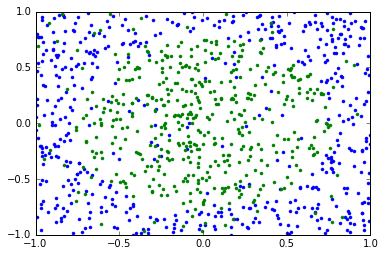

In [256]:
import numpy as np

N = 1000

features_1 = np.array([[1]]*N)
features_2 = np.array(np.random.uniform(-1., 1., size=(N, 2))) # generating two random, uniformly distributed points in [-1, 1]
features = np.hstack((features_1, features_2))

output = np.sign(features_2[:,0]*features_2[:,0] + features_2[:,1]*features_2[:,1] - 0.6)

# Added noise - flip the sign of the output in a randomly select 10% subset of the generated training set
flip_index = np.random.randint(0, N, size = (N/10, 1))
output_new = np.copy(output)
for i in flip_index:
    output_new[i] = - output[i]

data = np.hstack((features, [[i] for i in output_new]))
data_pos = data[[data[:,3] == +1.]]
data_neg = data[[data[:,3] == -1.]]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data_pos[:,1],data_pos[:,2],'.')
plt.plot(data_neg[:,1],data_neg[:,2],'.')


    
# Weights based on the Linear Regression Algorithm
weights = np.dot(np.linalg.pinv(features), output_new)    

# Calculate the sign of predictions
predictions = np.sign(np.dot(features, weights))

# compare the prediction with output
errors = graphlab.SArray(predictions == output)

# Calculate the in sample errors       
Error_in_sample = 1 - sum(errors) / float(len(errors))

Error_in_sample

In [257]:
itr = 0 
N = 1000

while itr < 100: 
    features_1 = np.array([[1]]*N)
    features_2 = np.array(np.random.uniform(-1., 1., size=(N, 2))) # generating two random, uniformly distributed points in [-1, 1]
    output = np.sign(features_2[:,0]*features_2[:,0] + features_2[:,1]*features_2[:,1] - 0.6)

    # Added noise - flip the sign of the output in a randomly select 10% subset of the generated training set
    flip_index = np.random.randint(0, N, size = (N/10, 1))
    output_new = np.copy(output)
    for i in flip_index:
        output_new[i] = - output[i]
       
    # transform the training data into nonlinear feacture vector
    # (1, x1, x2, x1x2, x1^2, x2^2)
    
    features_new_1 = [[i] for i in features_2[:,0]]
    features_new_2 = [[i] for i in features_2[:,1]]
    features_new_3 = [[i] for i in features_2[:,0]*features_2[:,1]]
    features_new_4 = [[i] for i in features_2[:,0]*features_2[:,0]]
    features_new_5 = [[i] for i in features_2[:,1]*features_2[:,1]]
    features_new = np.hstack((features_1, features_new_1, features_new_2, features_new_3, features_new_4, features_new_5))

    # Weights based on the Linear Regression Algorithm
    weights = np.dot(np.linalg.pinv(features_new), output_new) 
    print weights
    
    itr += 1

[-1.00071452  0.07319014 -0.01894785 -0.04535997  1.580193    1.63663514]
[-1.02209925 -0.01086338  0.0424435   0.06093544  1.49915841  1.63827346]
[-0.99928239  0.01660793 -0.00246204 -0.01692623  1.50871256  1.63765493]
[-0.99569932 -0.04701675 -0.02592377 -0.14688281  1.54340254  1.49736585]
[-1.02919256  0.01423972 -0.0598879  -0.01644381  1.61982833  1.56973493]
[-0.97628142  0.05138864  0.03357153  0.04208311  1.61357489  1.4551624 ]
[-0.95466527  0.02962875 -0.04419083 -0.04685297  1.54292976  1.42774049]
[-0.9931112  -0.01929032 -0.08726476  0.12219714  1.65374017  1.51730387]
[-1.0195369  -0.0254172   0.05061422  0.0995612   1.7014079   1.49351107]
[-1.01411402  0.00492658 -0.01459564  0.02988449  1.49395534  1.65343527]
[-0.98220628 -0.01451666  0.07890407 -0.00787625  1.61446364  1.65552943]
[-1.01823082 -0.09286327 -0.06340409  0.05603737  1.59794541  1.49066465]
[-0.93507795  0.04391847  0.03494384 -0.01339946  1.54966416  1.57978169]
[-1.00260752  0.02486038  0.00627561  

In [259]:
itr = 0
N = 1000
Error_out_sample_total = list()

while itr < 1000: 
    features_1 = np.array([[1]]*N)
    out_sample = np.array(np.random.uniform(-1., 1., size=(N, 2))) # generating two random, uniformly distributed points in [-1, 1]
    out_sample_output = np.sign(out_sample[:,0]*out_sample[:,0] + out_sample[:,1]*out_sample[:,1] - 0.6)
    flip_index = np.random.randint(0, N, size = (N/10, 1))
    
    # Added noise - flip the sign of the output in a randomly select 10% subset of the generated training set
    out_sample_output_new = np.copy(out_sample_output)
    for i in flip_index:
        out_sample_output_new[i] = - out_sample_output[i]
        
    # transform the training data into nonlinear feacture vector
    # (1, x1, x2, x1x2, x1^2, x2^2)
    
    out_sample_new_1 = [[i] for i in out_sample[:,0]]
    out_sample_new_2 = [[i] for i in out_sample[:,1]]
    out_sample_new_3 = [[i] for i in out_sample[:,0]*out_sample[:,1]]
    out_sample_new_4 = [[i] for i in out_sample[:,0]*out_sample[:,0]]
    out_sample_new_5 = [[i] for i in out_sample[:,1]*out_sample[:,1]]
    out_sample_new = np.hstack((features_1, out_sample_new_1, out_sample_new_2, out_sample_new_3, out_sample_new_4, out_sample_new_5))

    # Weights based on the Linear Regression Algorithm
    weights = np.dot(np.linalg.pinv(out_sample_new), out_sample_output_new) 
    #print weights

    # Calculate the sign of predictions
    out_sample_predictions = np.sign(np.dot(out_sample_new, weights))

    # Compare the prediction with output
    errors = graphlab.SArray(out_sample_predictions == out_sample_output)

    # Calculate the out sample errors        
    Error_out_sample = 1 - sum(errors) / float(len(errors))
    Error_out_sample_total.append(Error_out_sample)
    
    itr += 1
    
# Calculate the average out sample errors
Error_out_sample_avg = sum(Error_out_sample_total) / float(len(Error_out_sample_total))

print Error_out_sample_avg

0.030215
